In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

---

# First Dataset

This Dataset turned out to no be so clean, and since the other dataset -- Fake.BR corpus -- has enough, and clean, data, this one will be discarded.

In [2]:
df0 = pd.read_csv('Data/FACTCKBR.tsv', sep='\t')

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   URL              1313 non-null   object 
 1   Author           1313 non-null   object 
 2   datePublished    1313 non-null   object 
 3   claimReviewed    1300 non-null   object 
 4   reviewBody       1301 non-null   object 
 5   title            1313 non-null   object 
 6   ratingValue      1309 non-null   float64
 7   bestRating       1313 non-null   int64  
 8   alternativeName  1309 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 92.4+ KB


In [4]:
df0.head(3)

,URL,Author,datePublished,claimReviewed,reviewBody,title,ratingValue,bestRating,alternativeName
0,https://aosfatos.org/noticias/governo-bolsonar...,https:www.aosfatos.org,2019-07-22,Espaço dedicado para os eleitores do Bolsonaro...,Publicações que circulam nas redes sociais vej...,Governo Bolsonaro não suspendeu distribuição d...,1.0,5,falso
1,https://aosfatos.org/noticias/nao-e-miriam-lei...,https:www.aosfatos.org,2019-07-22,Vos apresento a funcionária protegida pela Glo...,Uma foto de um treinamento de defesa contra as...,Não é Miriam Leitão quem segura fuzil ao lado ...,1.0,5,falso
2,https://aosfatos.org/noticias/nao-e-verdade-qu...,https:www.aosfatos.org,2019-07-22,Você sabia que Benedita da Silva já foi embaix...,falsa a informação de que a deputada federal ...,Não é verdade que Benedita da Silva foi embaix...,1.0,5,falso


In [5]:
df0['alternativeName'].value_counts()

Falso                      615
falso                      328
Verdadeiro                 119
Exagerado                   87
Sem contexto                42
distorcido                  29
Distorcido                  25
Impossível provar           20
Discutível                  12
Ainda é cedo para dizer      6
Subestimado                  6
insustentável                5
Verdadeiro, mas              4
exagerado                    4
De olho                      3
impreciso                    2
verdadeiro                   1
outros                       1
Name: alternativeName, dtype: int64

---

# Second Dataset

From **Fake.Br Corpus** 
- This corpus is composed of aligned true and fake news, which analyzes to uncover some of their linguistic characteristics.
- The corpus – simply called “Fake.Br Corpus” – is composed of true and fake news that were manually aligned, focusing only on Brazilian Portuguese.
- manual step was necessary to check the details of the fake news and if they were in fact fake, as we wanted to guarantee the quality and reliability of the corpus.
- "We manually analyzed and collected all the available fake news (including their titles) in the corresponding time period from 4 websites: Diario do Brasil (3,338 news10), A Folha do Brasil (190 news), The Jornal Brasil (65 news) e Top Five TV (7 news). Finally, we filtered out those news that presented half truths11, keeping only the ones that were entirely fake."
- "The true news in the corpus were collected in a semiautomatic way. In a first step, using a web crawler, we collected news from major news agencies in Brazil, namely, G1, Folha de S ̃ao Paulo and Estad ̃ao."
- "About 40,000 true news were collected this way. Then, for each fake news, we applied a lexical similarity measure, choosing the most similar ones to the fake news, and performed a final manual verification to guarantee that the fake and true news were in fact subject-related."
- "To guarantee a fair classification, we have normalized the size of the texts (in number of words) by truncating the longer texts to the size of their aligned counterparts."

### Questions:

* Can these linguistic features serve as indications of fake content and be implemented in the classifcation model?
    - According to the **Fake.Br Corpus** paper, they little helped in the ML models, "Bag of words alone could (surprisingly) achieve good results (88% of F- measure, for both true and fake news), and other features did not help to significantly improve this".
* What is the 'diversity' feature?
* What is 'number of tokens'?
* What is 'number of types'?

<img src="table1.png" width=70% height=70%>

In [6]:
pwd

'/Users/braulio/Documents/github/FAKE'

## Import meta information

In [7]:
with open('Data/metadata_info.txt') as f:
    lines = f.readlines()

In [8]:
column_names = [x[:-1] for x in lines]

In [9]:
column_names

['author',
 'link',
 'category',
 'date of publication',
 'number of tokens',
 'number of words without punctuation',
 'number of types',
 'number of links inside the news',
 'number of words in upper case',
 'number of verbs',
 'number of subjunctive and imperative verbs',
 'number of nouns',
 'number of adjectives',
 'number of adverbs',
 'number of modal verbs (mainly auxiliary verbs)',
 'number of singular first and second personal pronouns',
 'number of plural first personal pronouns',
 'number of pronouns',
 'pausality',
 'number of characters',
 'average sentence length',
 'average word length',
 'percentage of news with spelling errors',
 'emotiveness',
 'diversity']

## Read all text files fakenews-meta-data information into a df

In [10]:
# Step 1: set the directory to the correct folder
dir1 = 'Data/fake-meta-information/'
file_list = os.listdir(dir1)
number_files = len(file_list)

In [11]:
number_files

3600

In [12]:
FAKE_f = []
FAKE_META = pd.DataFrame(columns=column_names)

for i in range(number_files):
        title = str(file_list[i])
        FAKE_f.append(1)
        df_temp = pd.read_csv(dir1 + title, escapechar='\\', names=column_names)
        new_row = df_temp['author']
        new_row = np.array(new_row)
        FAKE_META.loc[i] = new_row

In [13]:
FAKE_META.shape

(3600, 25)

In [14]:
len(FAKE_f)

3600

In [15]:
FAKE_META['Fake'] = FAKE_f

In [16]:
FAKE_META.head()

,author,link,category,date of publication,number of tokens,number of words without punctuation,number of types,number of links inside the news,number of words in upper case,number of verbs,...,number of plural first personal pronouns,number of pronouns,pausality,number of characters,average sentence length,average word length,percentage of news with spelling errors,emotiveness,diversity,Fake
0,None,https://www.diariodobrasil.org/temer-tem-poder...,politica,28/01/2018,133,111,81,0,2,28,...,1,9,1.83333,551,9.25,4.96396,0.0,0.218182,0.72973,1
1,None,https://www.diariodobrasil.org/mendes-se-desco...,politica,28/06/2017,171,142,106,0,3,23,...,0,9,2.07143,683,10.1429,4.80986,0.0,0.161765,0.746479,1
2,None,https://www.diariodobrasil.org/assessor-pessoa...,politica,18/01/2016,169,150,97,1,0,25,...,0,11,2.71429,743,21.4286,4.95333,0.00666667,0.101449,0.646667,1
3,None,https://www.diariodobrasil.org/homicidio-quali...,politica,23/02/2016,206,181,119,0,1,11,...,0,6,3.125,1005,22.625,5.55249,0.0,0.15,0.657459,1
4,None,https://www.diariodobrasil.org/carmen-lucia-se...,politica,21/05/2017,122,104,77,1,1,20,...,0,7,3.6,498,20.8,4.78846,0.0,0.195652,0.740385,1


## Read all text files true-news-meta-data information into a df

In [17]:
# Step 1: set the directory to the correct folder
dir2 = 'Data/true-meta-information/'
file_list = os.listdir(dir2)
number_files = len(file_list)

In [18]:
number_files

3600

In [19]:
FAKE_t = []
TRUE_META = pd.DataFrame(columns=column_names)

for i in range(number_files):
        title = str(file_list[i])
        FAKE_t.append(0)
        df_temp = pd.read_csv(dir2 + title, sep=';', escapechar='\\', names=column_names)
        new_row = df_temp['author']
        new_row = np.array(new_row)
        TRUE_META.loc[i] = new_row

In [20]:
TRUE_META.shape

(3600, 25)

In [21]:
len(FAKE_t)

3600

In [22]:
TRUE_META['Fake'] = FAKE_t

In [23]:
TRUE_META.head()

,author,link,category,date of publication,number of tokens,number of words without punctuation,number of types,number of links inside the news,number of words in upper case,number of verbs,...,number of plural first personal pronouns,number of pronouns,pausality,number of characters,average sentence length,average word length,percentage of news with spelling errors,emotiveness,diversity,Fake
0,"Carla Araújo, O Estado de S.Paulo","http://politica.estadao.com.br/noticias/geral,...",politica,16 de novembro de 2017,683,574,280,None,3,115,...,2,35,3.75862,2709,19.7931,4.71951,0.0,0.161871,0.487805,0
1,"Por Fernando Evans e Fernando Pacífico, G1 Ca...",https://g1.globo.com/sp/campinas-regiao/notici...,politica,27/11/2017 19h21,1522,1315,587,0,10,164,...,0,44,4.05882,6826,25.7843,5.19087,0.00152091,0.170248,0.446388,0
2,"Por Bernardo Caram, Gustavo Garcia, Fernanda ...",https://g1.globo.com/politica/noticia/relator-...,politica,10/10/2017 17h18,1185,1001,465,None,24,154,...,0,58,4.08889,5135,22.2444,5.12987,0.001998,0.170626,0.464535,0
3,Por G1 PE,https://g1.globo.com/pernambuco/noticia/apos-s...,politica,10/11/2017 18h28,1878,1650,725,0,16,192,...,0,54,3.21127,8709,23.2394,5.27818,0.000606061,0.203898,0.439394,0
4,"Por Renan Ramalho, G1, Brasília",https://g1.globo.com/politica/noticia/carmen-l...,politica,15/01/2018 12h26,767,664,333,0,15,102,...,0,38,3.43333,3262,22.1333,4.91265,0.0,0.132013,0.501506,0


----

### Join both df with the dummy column "Fake"

In [24]:
df = pd.concat([FAKE_META, TRUE_META])

In [25]:
df['number of links inside the news'].unique()

array(['0', '1', '2', '3', '4', '6', '5', '11', '8', '9', 'None'],
      dtype=object)

In [26]:
df.loc[df['number of links inside the news'] == 'None', 'number of links inside the news'] = 0

In [27]:
df['number of links inside the news'].unique()

array(['0', '1', '2', '3', '4', '6', '5', '11', '8', '9', 0], dtype=object)

In [28]:
df.columns

Index(['author', 'link', 'category', 'date of publication', 'number of tokens',
       'number of words without punctuation', 'number of types',
       'number of links inside the news', 'number of words in upper case',
       'number of verbs', 'number of subjunctive and imperative verbs',
       'number of nouns', 'number of adjectives', 'number of adverbs',
       'number of modal verbs (mainly auxiliary verbs)',
       'number of singular first and second personal pronouns',
       'number of plural first personal pronouns', 'number of pronouns',
       'pausality', 'number of characters', 'average sentence length',
       'average word length', 'percentage of news with spelling errors',
       'emotiveness', 'diversity', 'Fake'],
      dtype='object')

In [29]:
df[['number of tokens', 'number of words without punctuation', 'number of types', 
    'number of links inside the news', 'number of words in upper case', 'number of verbs', 
    'number of verbs', 'number of subjunctive and imperative verbs', 'number of nouns', 
   'number of adjectives', 'number of adverbs', 'number of modal verbs (mainly auxiliary verbs)', 
   'number of singular first and second personal pronouns', 'number of plural first personal pronouns', 
   'number of pronouns', 'pausality', 'number of characters', 'average sentence length', 'average word length', 
   'percentage of news with spelling errors', 'emotiveness', 'diversity']] = df[['number of tokens', 'number of words without punctuation', 'number of types', 
    'number of links inside the news', 'number of words in upper case', 'number of verbs', 
    'number of verbs', 'number of subjunctive and imperative verbs', 'number of nouns', 
   'number of adjectives', 'number of adverbs', 'number of modal verbs (mainly auxiliary verbs)', 
   'number of singular first and second personal pronouns', 'number of plural first personal pronouns', 
   'number of pronouns', 'pausality', 'number of characters', 'average sentence length', 'average word length', 
   'percentage of news with spelling errors', 'emotiveness', 'diversity']].apply(pd.to_numeric)

In [30]:
df['number of links inside the news'].unique()

array([ 0,  1,  2,  3,  4,  6,  5, 11,  8,  9])

In [31]:
df.describe()

,number of tokens,number of words without punctuation,number of types,number of links inside the news,number of words in upper case,number of verbs,number of subjunctive and imperative verbs,number of nouns,number of adjectives,number of adverbs,...,number of plural first personal pronouns,number of pronouns,pausality,number of characters,average sentence length,average word length,percentage of news with spelling errors,emotiveness,diversity,Fake
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.00000,7200.000000,7200.000000,7200.000000,7200.000000,...,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,742.763333,646.172222,306.896250,0.173472,7.680694,100.76750,4.063194,182.920278,33.154444,30.014444,...,0.502639,38.758056,2.755722,3138.628333,18.229019,4.845171,0.003065,0.209758,0.577903,0.500000
std,774.155454,674.901525,260.201075,0.549322,9.860613,108.03151,5.492677,186.507322,39.702327,37.742105,...,1.697008,51.759915,1.154137,3283.090323,6.090270,0.246260,0.007780,0.070239,0.126475,0.500035
min,11.000000,9.000000,9.000000,0.000000,0.000000,1.00000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.250000,34.000000,2.666670,3.615940,0.000000,0.000000,0.232210,0.000000
25%,183.000000,157.000000,106.000000,0.000000,2.000000,26.00000,1.000000,46.000000,7.000000,7.000000,...,0.000000,8.000000,2.166670,755.000000,14.372850,4.696408,0.000000,0.162500,0.471088,0.000000
50%,416.000000,362.000000,208.000000,0.000000,5.000000,57.00000,2.000000,106.000000,18.000000,15.000000,...,0.000000,19.000000,2.684015,1756.500000,18.115250,4.846540,0.000579,0.204082,0.577402,0.500000
75%,1064.250000,928.250000,440.000000,0.000000,10.000000,141.00000,5.000000,265.000000,45.000000,39.000000,...,0.000000,49.000000,3.224992,4523.000000,21.823775,4.994038,0.003799,0.251055,0.676276,1.000000
max,8634.000000,7588.000000,2805.000000,11.000000,233.000000,1148.00000,65.000000,2170.000000,532.000000,497.000000,...,54.000000,720.000000,51.238100,37381.000000,110.250000,5.935780,0.382353,0.750000,1.000000,1.000000


---

### Visualization time!

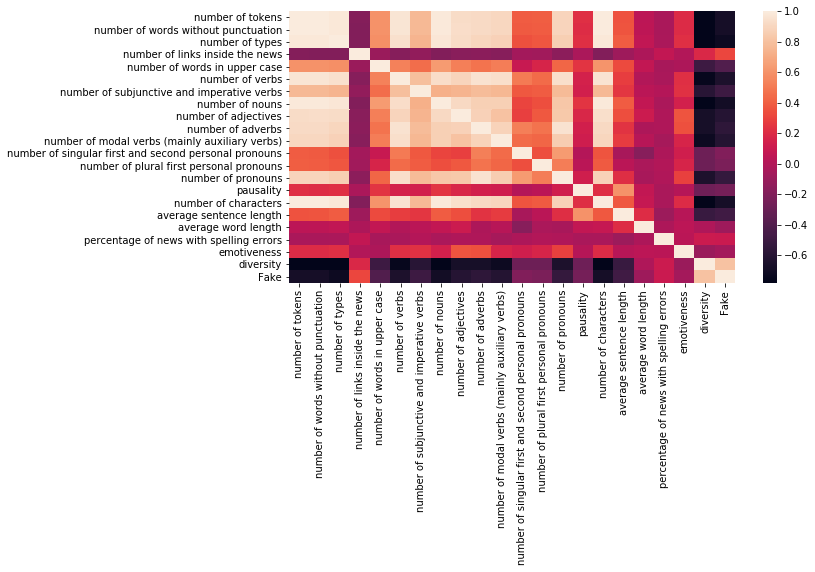

In [32]:
plt.figure(figsize=(10,5))

sns.heatmap(df.corr())

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """


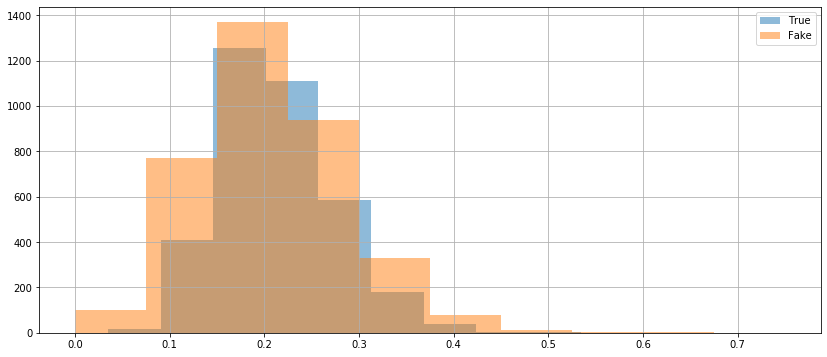

In [33]:
plt.figure(figsize=(14,6))

ax1=df[df["Fake"]==0]["emotiveness"].hist(alpha=0.5)
ax2=df[df["Fake"]==1]["emotiveness"].hist(alpha=0.5)
plt.legend([ax1, ax2], labels=["True", "Fake"])

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """


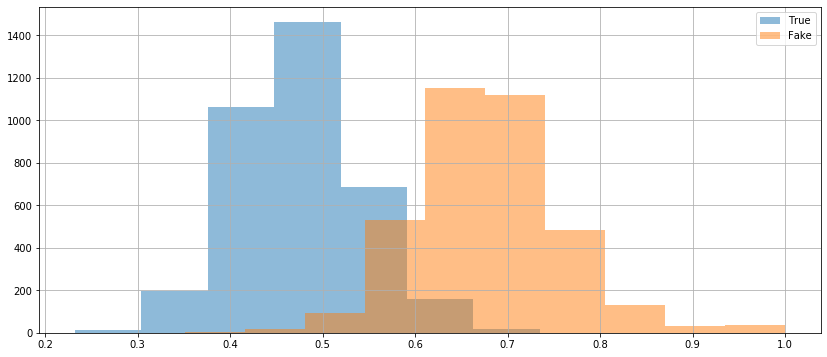

In [34]:
plt.figure(figsize=(14,6))

ax1=df[df["Fake"]==0]["diversity"].hist(alpha=0.5)
ax2=df[df["Fake"]==1]["diversity"].hist(alpha=0.5)
plt.legend([ax1, ax2], labels=["True", "Fake"])

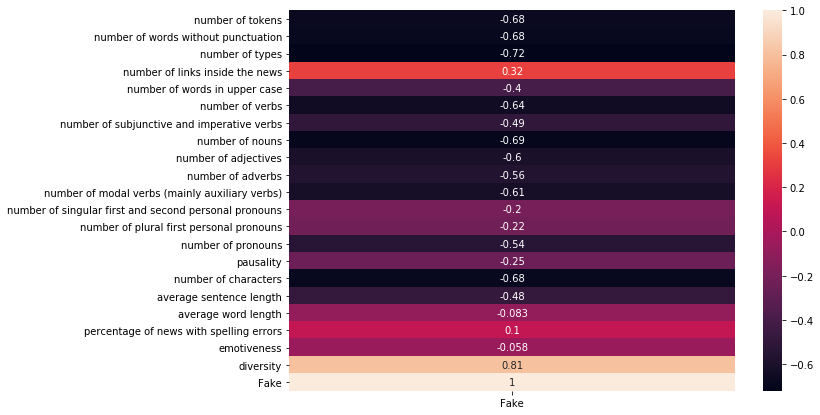

In [35]:
plt.figure(figsize=(10,7))

sns.heatmap(df.corr()[['Fake']], annot=True)

In [36]:
#Correlation series with all the columns
correlations = df.corr()[['Fake']]

### Top positive correlations with Fake News

In [37]:
correlations.sort_values(by=['Fake'], ascending=[False]).head(3)

,Fake
Fake,1.000000
diversity,0.809538
number of links inside the news,0.315815


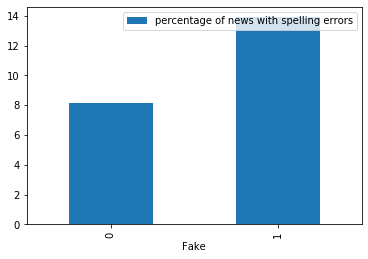

In [38]:
df[['percentage of news with spelling errors', 'Fake']].groupby(['Fake']).sum().plot.bar()

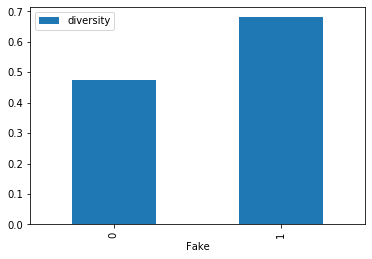

In [39]:
df[['diversity', 'Fake']].groupby(['Fake']).mean().plot.bar()

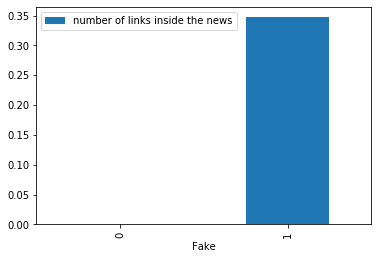

In [40]:
df[['number of links inside the news', 'Fake']].groupby(['Fake']).mean().plot.bar()

### Top negative correlations with Fake News

In [41]:
correlations.sort_values(by=['Fake'], ascending=[False]).tail(8)

,Fake
number of adjectives,-0.602022
number of modal verbs (mainly auxiliary verbs),-0.613285
number of verbs,-0.643903
number of tokens,-0.680178
number of words without punctuation,-0.682201
number of characters,-0.682997
number of nouns,-0.694120
number of types,-0.720794


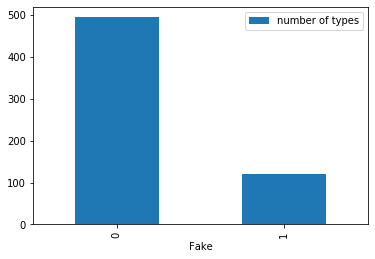

In [42]:
df[['number of types', 'Fake']].groupby(['Fake']).mean().plot.bar()

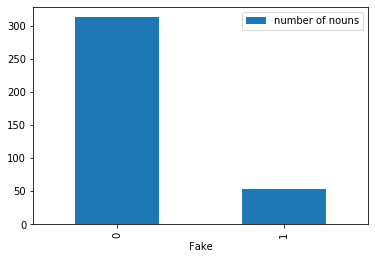

In [43]:
df[['number of nouns', 'Fake']].groupby(['Fake']).mean().plot.bar()

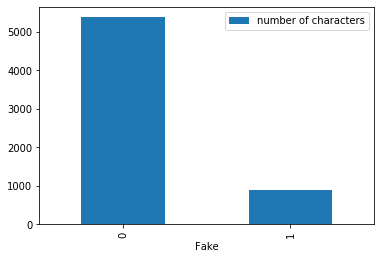

In [44]:
df[['number of characters', 'Fake']].groupby(['Fake']).mean().plot.bar()

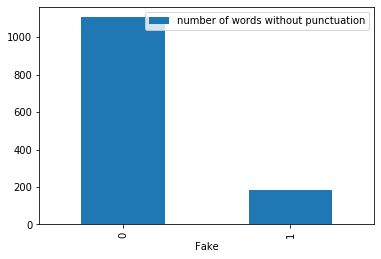

In [45]:
df[['number of words without punctuation', 'Fake']].groupby(['Fake']).mean().plot.bar()

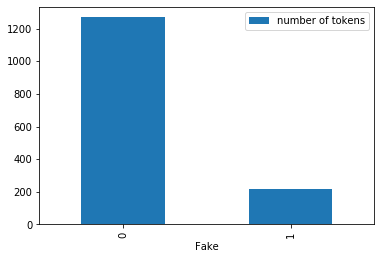

In [46]:
df[['number of tokens', 'Fake']].groupby(['Fake']).mean().plot.bar()

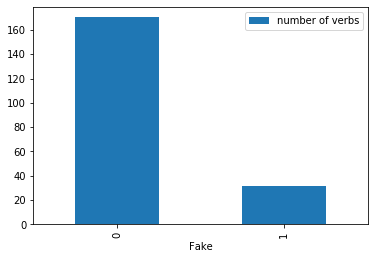

In [47]:
df[['number of verbs', 'Fake']].groupby(['Fake']).mean().plot.bar()

In [48]:
df[['number of modal verbs (mainly auxiliary verbs)', 'Fake']].groupby(['Fake']).mean()

,number of modal verbs (mainly auxiliary verbs)
Fake,
0,23.253611
1,4.484444


In [49]:
df[['number of adjectives', 'Fake']].groupby(['Fake']).mean()

,number of adjectives
Fake,
0,57.054444
1,9.254444
